<a href="https://colab.research.google.com/github/RXX17/Image-Processing/blob/main/OsteoNasNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.nasnet import NASNetLarge
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [10]:
# Image size and loading datasets
IMAGE_SIZE = (331, 331, 3)

train_path = '/content/drive/MyDrive/Split/train'
valid_path = '/content/drive/MyDrive/Split/val'

In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

nasnet = NASNetLarge(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

343610240/343610240 [==============================] - 21s 0us/step


In [13]:
# don't train existing weights
for layer in nasnet.layers:
    layer.trainable = False

In [14]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Split/train/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(nasnet.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=nasnet.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Split/train',
                                                 target_size = (331, 331),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 913 images belonging to 4 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Split/val',
                                            target_size = (331, 331),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 4 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-23-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
29/29 [==============================] - 676s 23s/step - loss: 14.9521 - accuracy: 0.6977 - val_loss: 9.6233 - val_accuracy: 0.7922
Epoch 2/50
29/29 [==============================] - 46s 2s/step - loss: 5.8243 - accuracy: 0.8368 - val_loss: 8.0963 - val_accuracy: 0.7706
Epoch 3/50
29/29 [==============================] - 46s 2s/step - loss: 4.6734 - accuracy: 0.8839 - val_loss: 8.1367 - val_accuracy: 0.7576
Epoch 4/50
29/29 [==============================] - 46s 2s/step - loss: 3.3421 - accuracy: 0.9036 - val_loss: 8.4162 - val_accuracy: 0.7792
Epoch 5/50
29/29 [==============================] - 46s 2s/step - loss: 2.2247 - accuracy: 0.9211 - val_loss: 9.2723 - val_accuracy: 0.7359
Epoch 6/50
29/29 [==============================] - 46s 2s/step - loss: 2.7486 - accuracy: 0.9179 - val_loss: 8.1448 - val_accuracy: 0.7965
Epoch 7/50
29/29 [==============================] - 47s 2s/step - loss: 2.1689 - accuracy: 0.9343 - val_loss: 9.4974 - val_accuracy: 0.8268
Epoch 8/50
29/29 

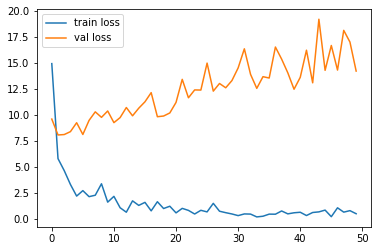

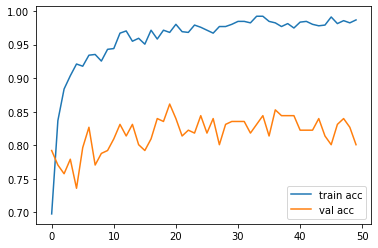

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')